## Dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Lectura de datos

In [2]:
df_cont = pd.read_csv('data/SD_TecMTY_contaminantes_2021_2022.csv')
df_meteo = pd.read_csv('data/SD_TecMTY_meteorologia_2021_2022.csv')

df_cont.drop(columns=['Unnamed: 0'], inplace=True)
df_meteo.drop(columns=['Unnamed: 0'], inplace=True)

print(f'''Size of databases
Contaminants: {df_cont.shape}
Meteorology: {df_meteo.shape}''')


Size of databases
Contaminants: (65754, 30)
Meteorology: (76710, 30)


In [3]:
locations = {
        "Guadalupe, La Pastora" : "SE",
        "San Nicolás de los Garzas, San Nicolás" : "NE",
        "Monterrey, Obispado" : "CE",
        "Monterrey, San Bernabé": "NO",
        "Santa Catarina, Santa Catarina": "SO",
        "García, García" : "NO2",
        "Escobedo, Escobedo": "NTE",
        "Apodaca, Apodaca" : "NE2",
        "Juárez, Juárez" : "SE2",
        "San Pedro Garza García, San Pedro": "SO2"
        }

meteo_params = ['TOUT', 'RH', 'SR', 'RAINF', 'PRS', 'WSR', 'WDR']
cont_params = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2', 'CO']

## Limpieza de datos

In [4]:
def clean_data(station: str, dataframe: pd.DataFrame, type: str) -> pd.DataFrame:

    # Get value of key
    # Try and catch in case the station is not in the dictionary
    try:
        location = locations[station]
    except:
        raise ValueError('Station not found')
    
    # Columns
    dataframe.parameter = dataframe.parameter.str.strip()
    dataframe = pd.pivot(dataframe, index='date', columns=['parameter'], values=[location, f'{location}_b'])
    dataframe.columns = [f'{location}-' + col[1] if col[0] == location else f'{location}_b-' + col[1] for col in dataframe.columns]
    dataframe.reset_index(inplace=True)
    dataframe.date = pd.to_datetime(dataframe.date)

    if type == 'meteo':
        for param in meteo_params:
            dataframe[f'{location}-{param}'] = dataframe[f'{location}-{param}'].astype(float)
            
    elif type == 'cont':
        
        for param in cont_params:
            dataframe[f'{location}-{param}'] = pd.to_numeric(dataframe[f'{location}-{param}'], errors='coerce')
            
    else:
        raise ValueError('Type must be meteo or cont')

    return dataframe

In [5]:
def merge_df(meteo_df, cont_df):
    df = pd.merge(meteo_df, cont_df, how='inner', on='date')
    return df

In [6]:
dfm = clean_data('Monterrey, Obispado', df_meteo, 'meteo')
dfc = clean_data('Monterrey, Obispado', df_cont, 'cont')

In [7]:
dfm.head()

,date,CE-PRS,CE-RAINF,CE-RH,CE-SR,CE-TOUT,CE-WDR,CE-WSR,CE_b-PRS,CE_b-RAINF,CE_b-RH,CE_b-SR,CE_b-TOUT,CE_b-WDR,CE_b-WSR
0,2021-07-01 00:00:00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,x,x,x,l,x,x,x
1,2021-07-01 01:00:00,712.29999,0.0,80.0,0.0,22.280001,82.0,6.1,,,,,,,
2,2021-07-01 02:00:00,712.00000,0.0,82.0,0.0,22.350000,45.0,5.5,,,,,,,
3,2021-07-01 03:00:00,711.90002,0.0,83.0,0.0,22.160000,47.0,7.1,,,,,,,
4,2021-07-01 04:00:00,711.90002,0.0,84.0,0.0,22.049999,67.0,7.0,,,,,,,


In [8]:
dfc.head()

,date,CE-CO,CE-NO2,CE-O3,CE-PM10,CE-PM2.5,CE-SO2,CE_b-CO,CE_b-NO2,CE_b-O3,CE_b-PM10,CE_b-PM2.5,CE_b-SO2
0,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,a,x,x,x,x,x
1,2021-07-01 01:00:00,1.77,2.2,21.0,21.0,3.54,1.8,,,,,,
2,2021-07-01 02:00:00,1.80,2.7,18.0,17.0,NaN,1.8,,,,,x,
3,2021-07-01 03:00:00,1.79,2.4,19.0,21.0,NaN,1.7,,,,,x,
4,2021-07-01 04:00:00,1.77,1.8,20.0,58.0,NaN,1.8,,,,,x,


In [9]:
df = merge_df(dfm, dfc)
df.head()

,date,CE-PRS,CE-RAINF,CE-RH,CE-SR,CE-TOUT,CE-WDR,CE-WSR,CE_b-PRS,CE_b-RAINF,...,CE-O3,CE-PM10,CE-PM2.5,CE-SO2,CE_b-CO,CE_b-NO2,CE_b-O3,CE_b-PM10,CE_b-PM2.5,CE_b-SO2
0,2021-07-01 00:00:00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,x,x,...,NaN,NaN,NaN,NaN,a,x,x,x,x,x
1,2021-07-01 01:00:00,712.29999,0.0,80.0,0.0,22.280001,82.0,6.1,,,...,21.0,21.0,3.54,1.8,,,,,,
2,2021-07-01 02:00:00,712.00000,0.0,82.0,0.0,22.350000,45.0,5.5,,,...,18.0,17.0,NaN,1.8,,,,,x,
3,2021-07-01 03:00:00,711.90002,0.0,83.0,0.0,22.160000,47.0,7.1,,,...,19.0,21.0,NaN,1.7,,,,,x,
4,2021-07-01 04:00:00,711.90002,0.0,84.0,0.0,22.049999,67.0,7.0,,,...,20.0,58.0,NaN,1.8,,,,,x,


## Distribución de los contaminantes

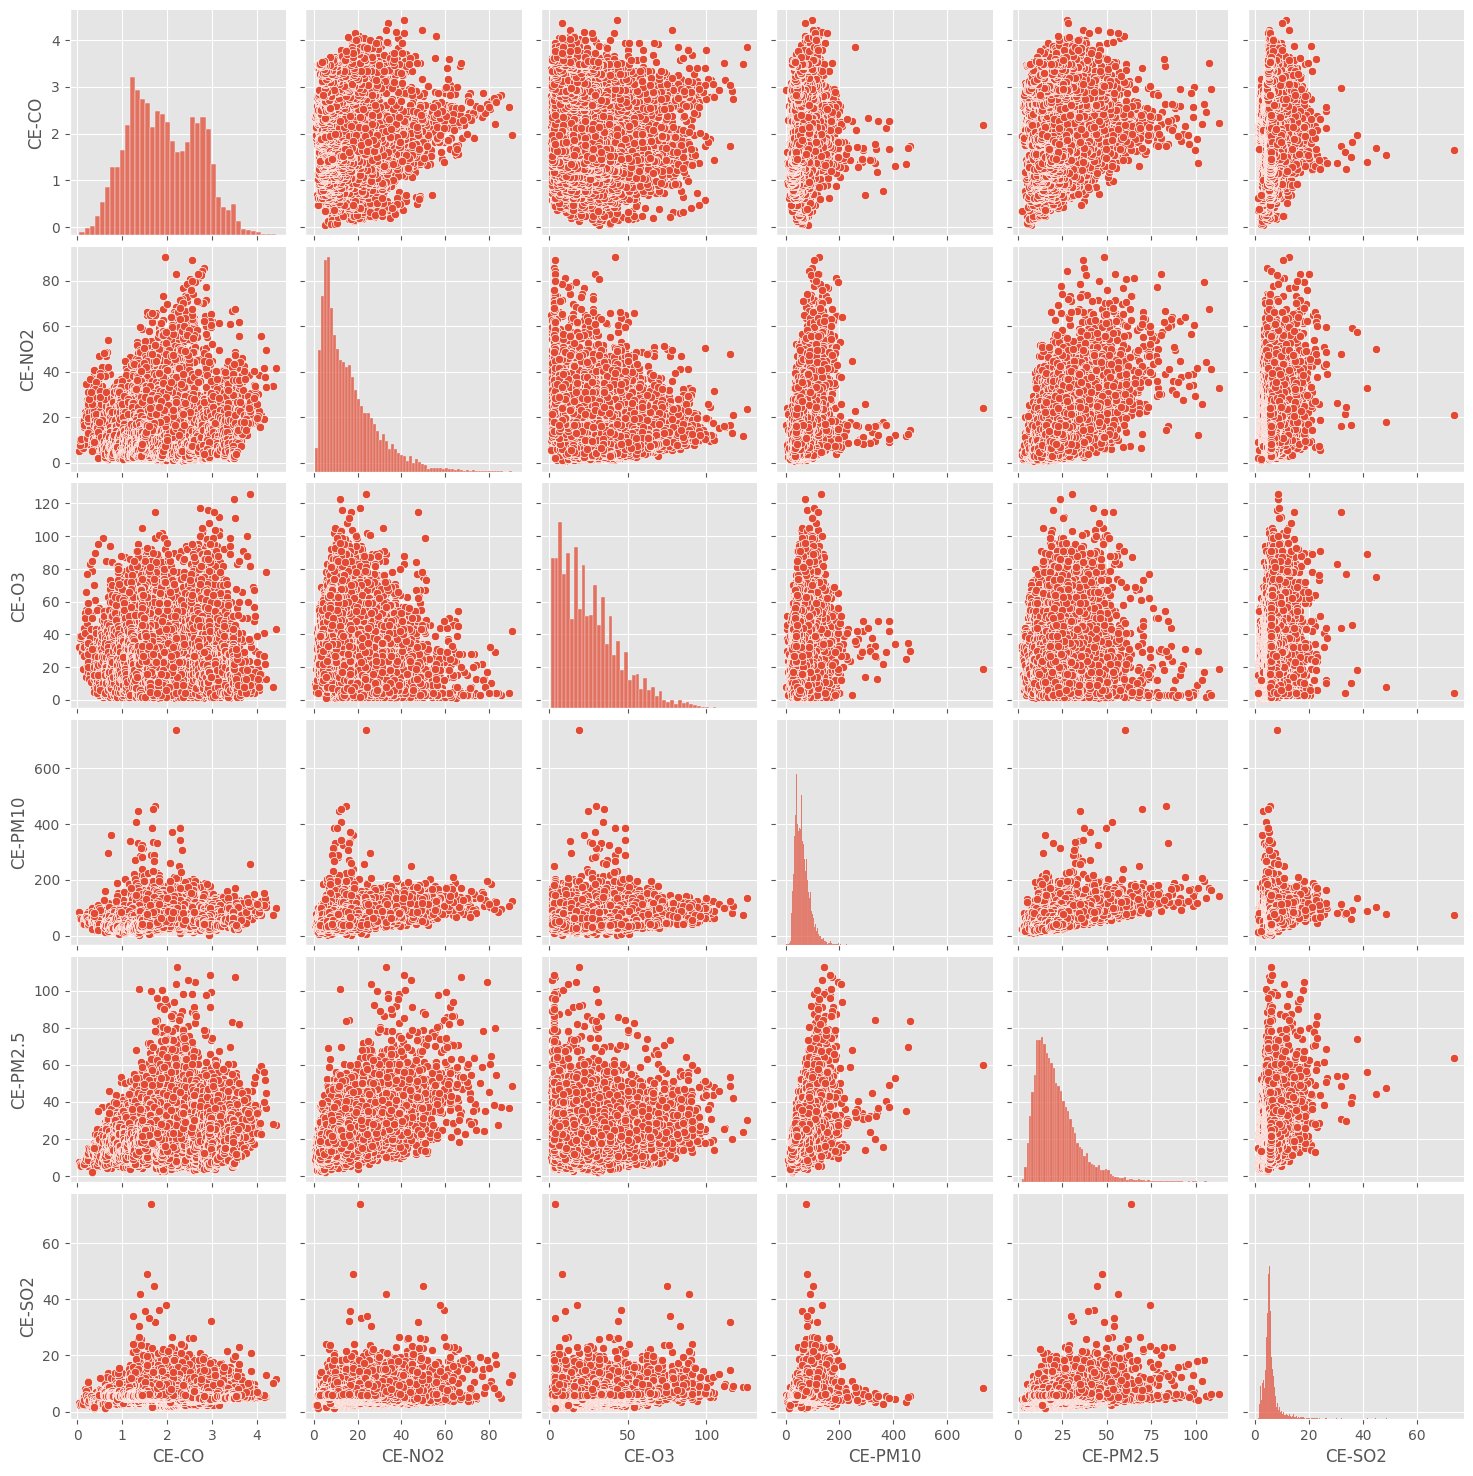

In [10]:
# Plot the distribution of every contaminant
sns.pairplot(dfc)

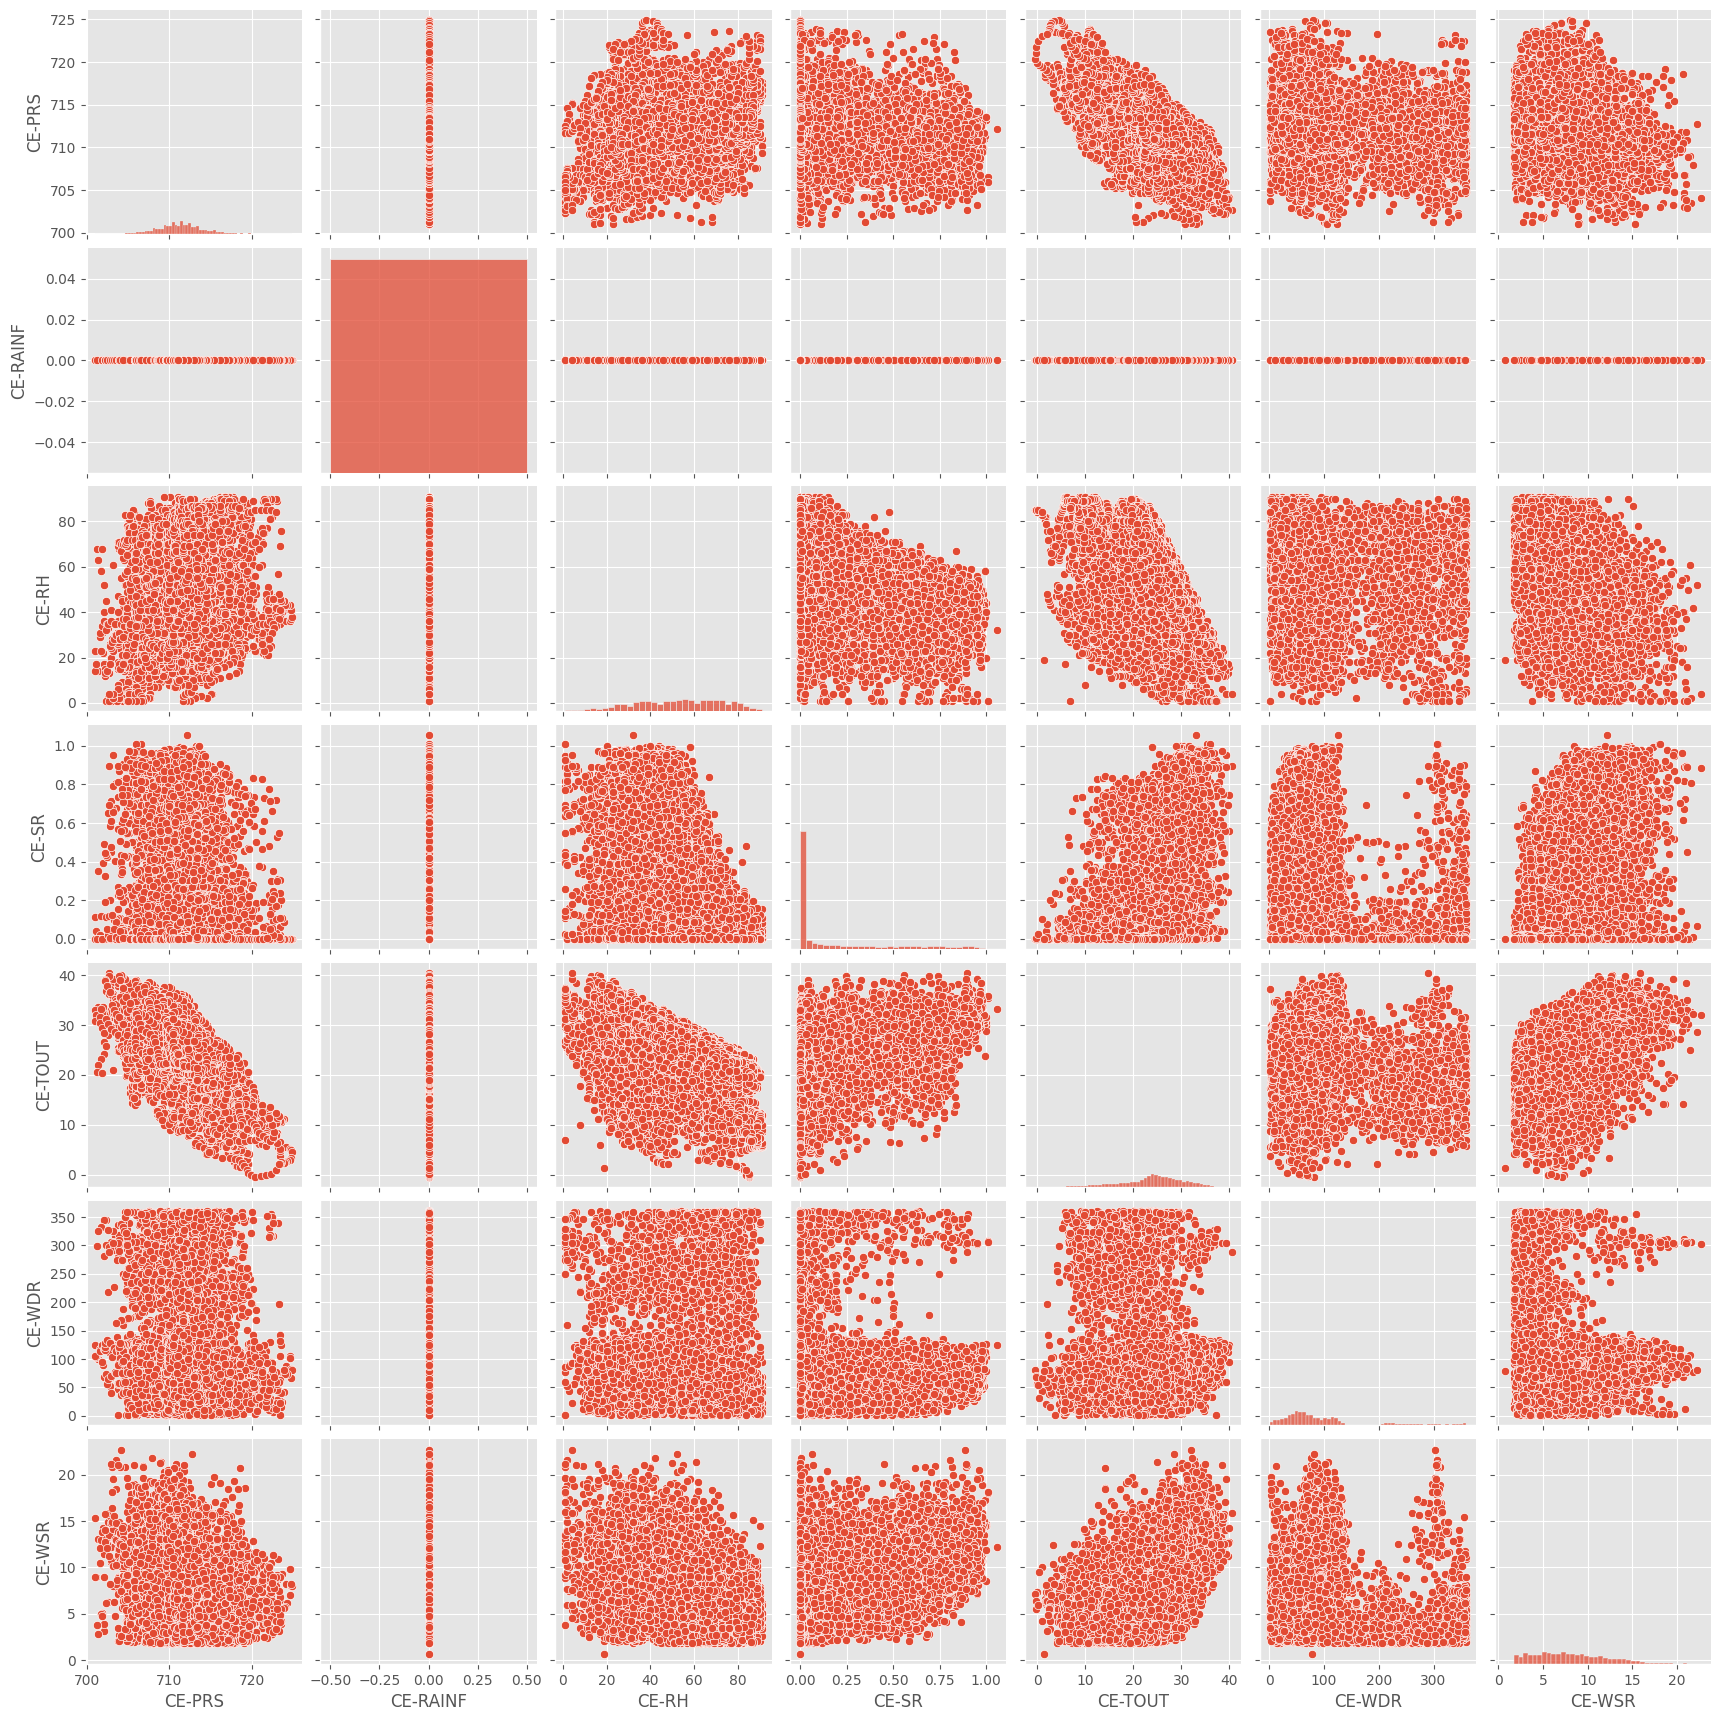

In [11]:
sns.pairplot(dfm)

In [12]:
dfc.head()

,date,CE-CO,CE-NO2,CE-O3,CE-PM10,CE-PM2.5,CE-SO2,CE_b-CO,CE_b-NO2,CE_b-O3,CE_b-PM10,CE_b-PM2.5,CE_b-SO2
0,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,a,x,x,x,x,x
1,2021-07-01 01:00:00,1.77,2.2,21.0,21.0,3.54,1.8,,,,,,
2,2021-07-01 02:00:00,1.80,2.7,18.0,17.0,NaN,1.8,,,,,x,
3,2021-07-01 03:00:00,1.79,2.4,19.0,21.0,NaN,1.7,,,,,x,
4,2021-07-01 04:00:00,1.77,1.8,20.0,58.0,NaN,1.8,,,,,x,


In [13]:
cont_flag_cols = [col for col in dfc.columns if 'b' in col]
cont_flag_cols

['CE_b-CO', 'CE_b-NO2', 'CE_b-O3', 'CE_b-PM10', 'CE_b-PM2.5', 'CE_b-SO2']

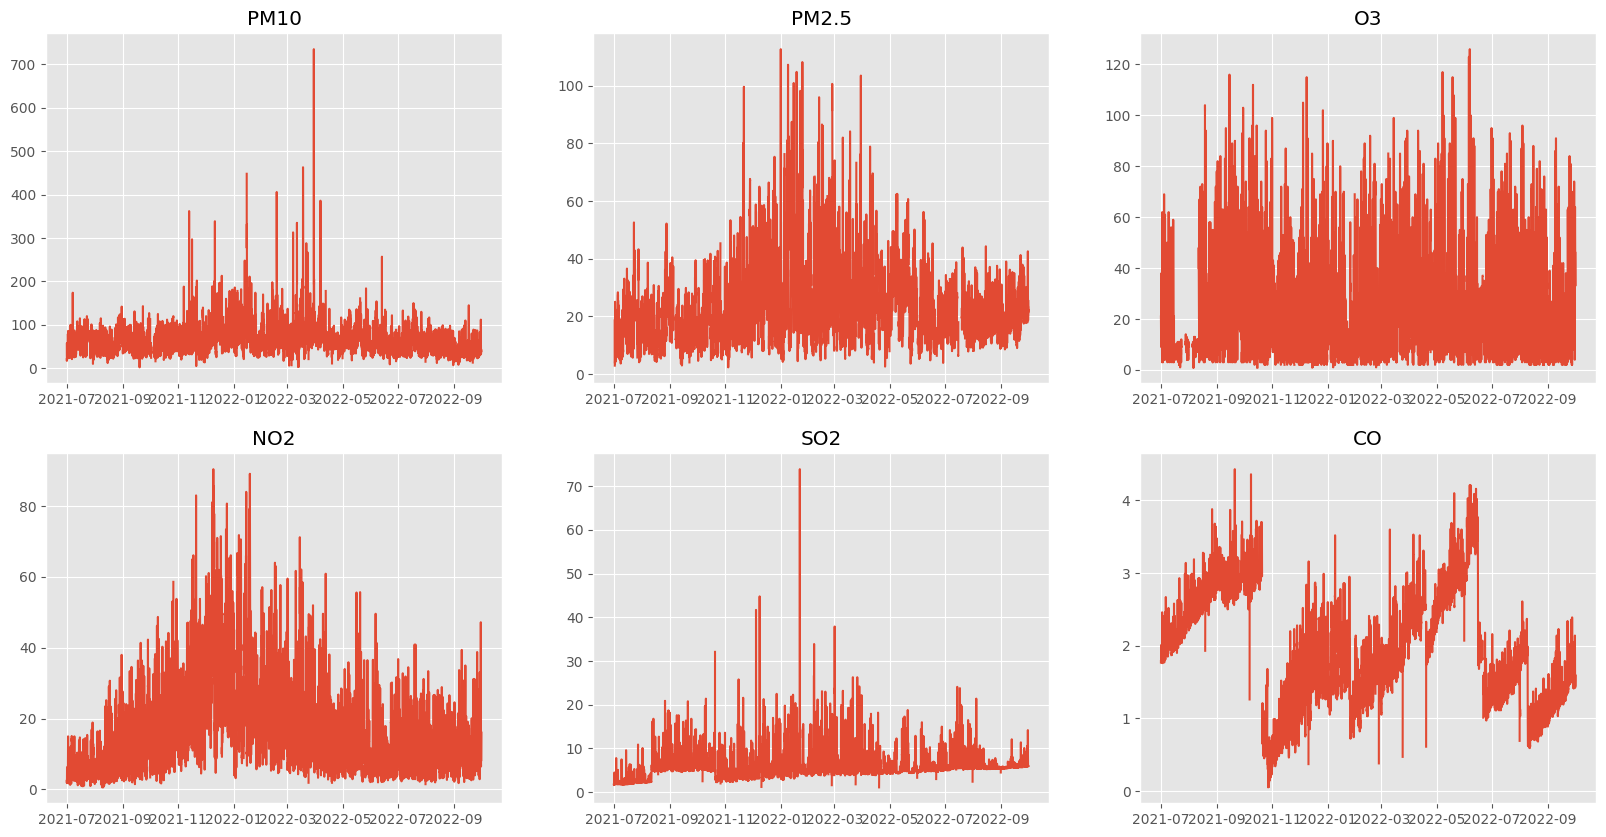

In [14]:
# Make a time series plot of every contaminant
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, param in enumerate(cont_params):
    ax[i//3, i%3].plot(dfc.date, dfc[f'CE-{param}'])
    ax[i//3, i%3].set_title(param)

/tmp/ipykernel_15922/4253705882.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax[i//3, i%3].plot(dfc.groupby(dfc.date.dt.month).mean()[f'CE-{param}'])
/tmp/ipykernel_15922/4253705882.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax[i//3, i%3].plot(dfc.groupby(dfc.date.dt.month).mean()[f'CE-{param}'])
/tmp/ipykernel_15922/4253705882.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax[i//3, i%3].plot(dfc.

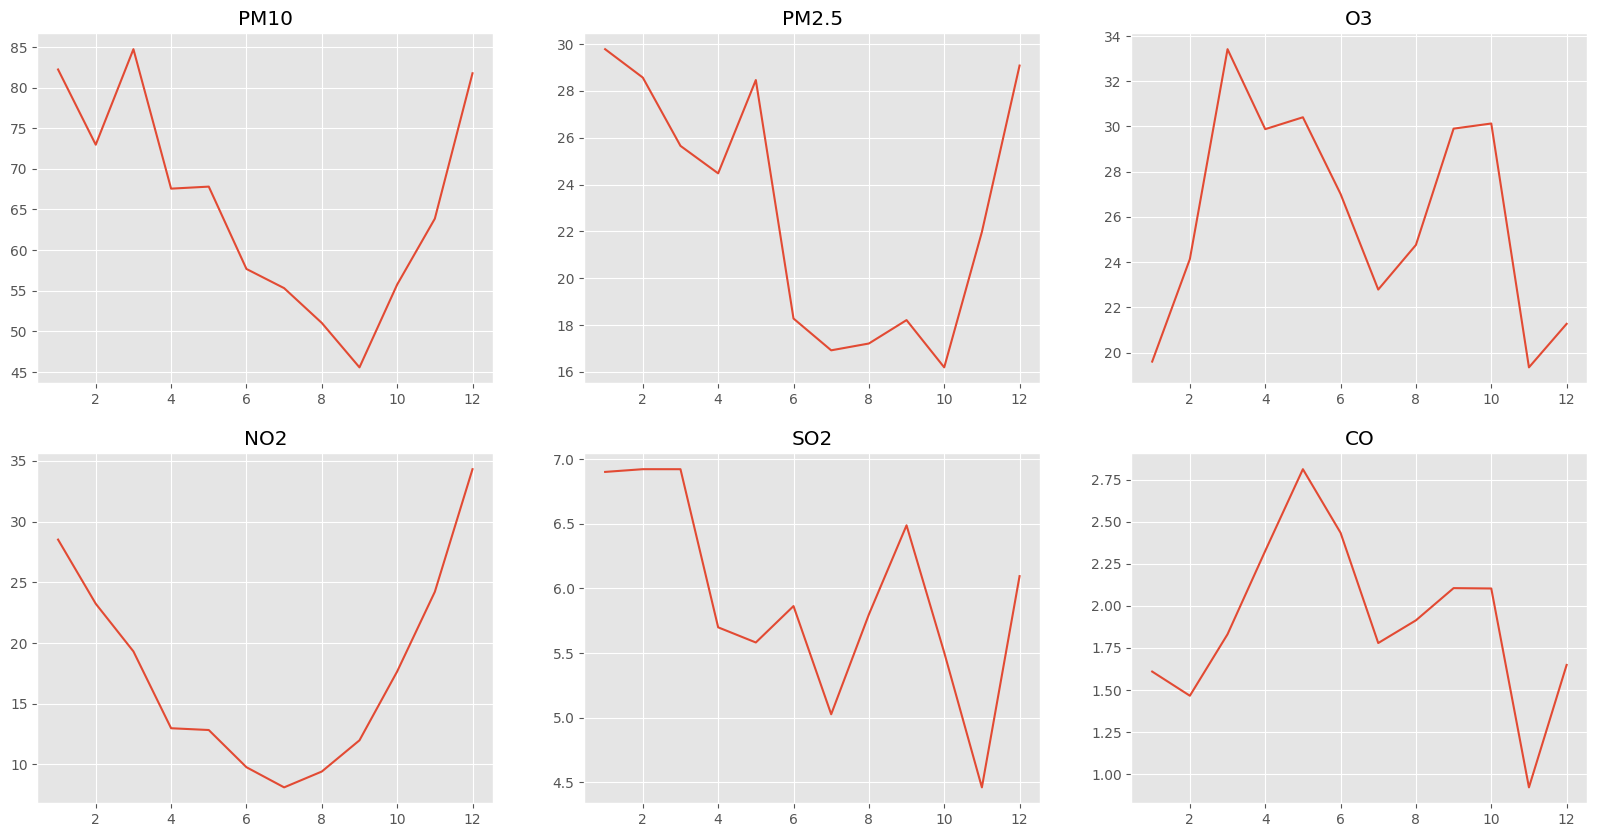

In [15]:
# Plot average of contaminant per month for every year
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, param in enumerate(cont_params):
    ax[i//3, i%3].plot(dfc.groupby(dfc.date.dt.month).mean()[f'CE-{param}'])
    ax[i//3, i%3].set_title(param)

/tmp/ipykernel_15922/3958441851.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = dfc.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()


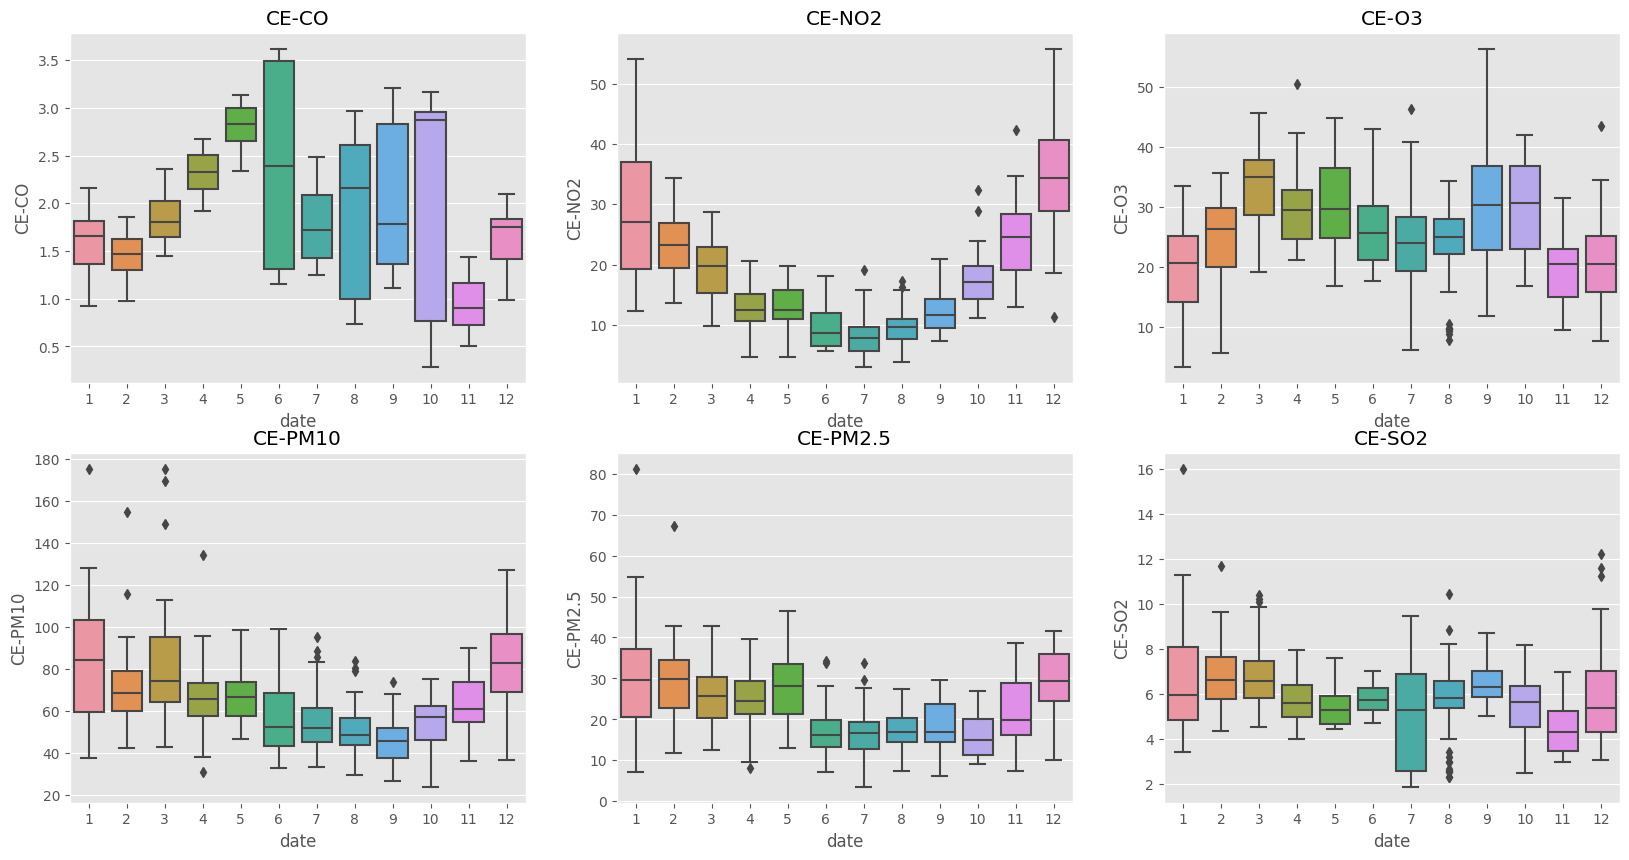

In [25]:
# Groupby month and year
temp_df = dfc.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()
num_cols = temp_df.columns[1:]
# Make a boxplot for each month of every contaminant
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, param in enumerate(num_cols):
    sns.boxplot(x=temp_df.date.dt.month, y=param, data=temp_df, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(param)

/tmp/ipykernel_15922/198291347.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = dfc.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()


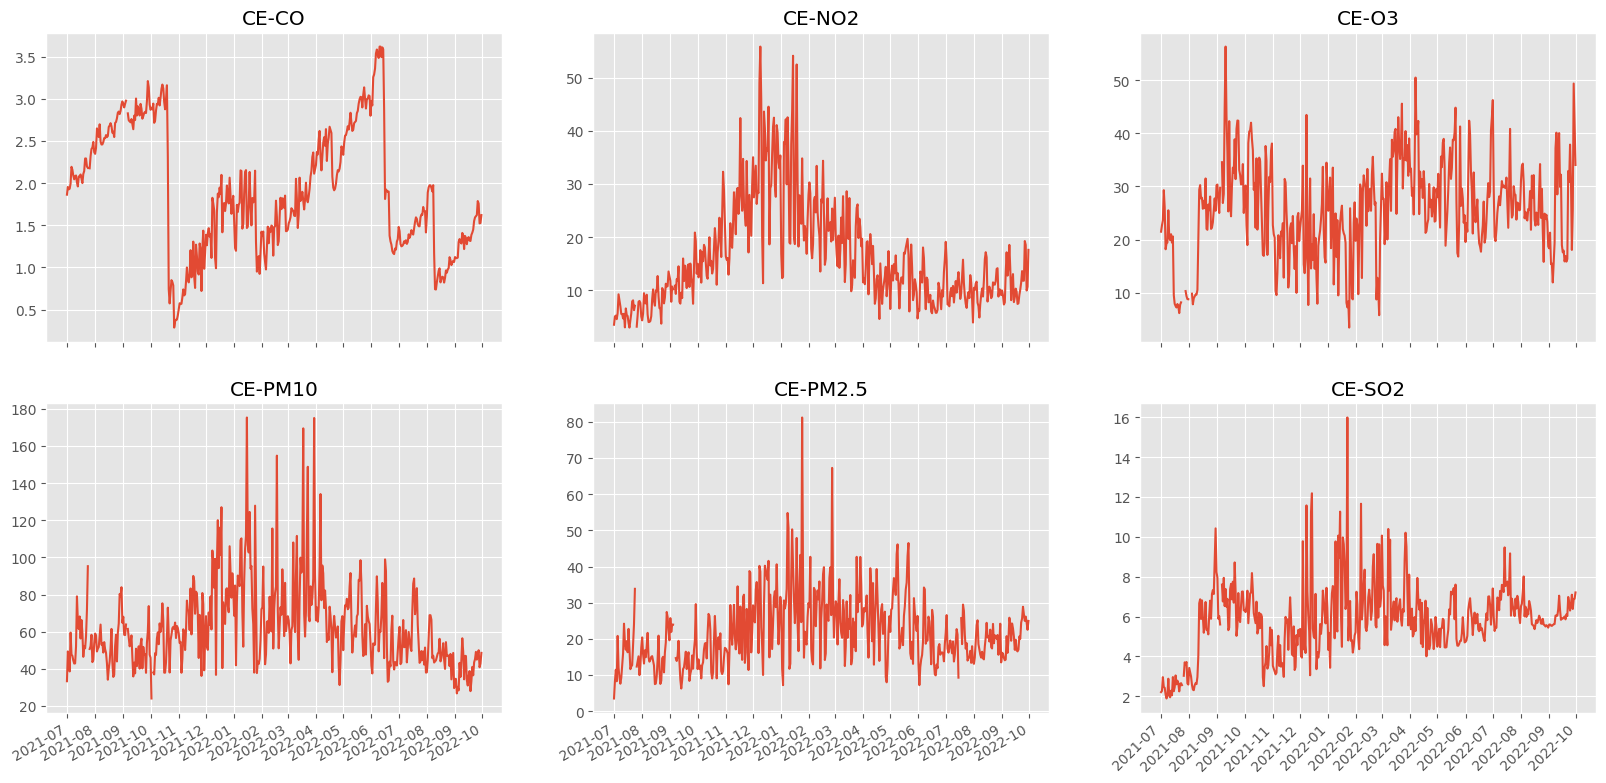

In [31]:
import matplotlib.dates as mdates
temp_df = dfc.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()
num_cols = temp_df.columns[1:]

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, param in enumerate(num_cols):
    ax[i//3, i%3].plot(temp_df.date, temp_df[param])
    ax[i//3, i%3].set_title(param)
    ax[i//3, i%3].xaxis.set_major_locator(months)
    ax[i//3, i%3].xaxis.set_major_formatter(years_fmt)
    ax[i//3, i%3].xaxis.set_minor_locator(months)
    ax[i//3, i%3].format_xdata = mdates.DateFormatter('%Y-%m-%d')
    fig.autofmt_xdate()
    plt.xticks(rotation=45)



In [17]:
for col in cont_flag_cols:
    print(col)
    print(dfc[col].value_counts())

CE_b-CO
     10713
a      243
n        2
x        1
Name: CE_b-CO, dtype: int64
CE_b-NO2
     10708
e      150
x       95
s        4
n        2
Name: CE_b-NO2, dtype: int64
CE_b-O3
     10337
x      380
s      224
l       15
n        2
e        1
Name: CE_b-O3, dtype: int64
CE_b-PM10
     10620
x      241
o       92
a        3
n        2
s        1
Name: CE_b-PM10, dtype: int64
CE_b-PM2.5
     10309
x      592
r       34
a       13
s        9
n        2
Name: CE_b-PM2.5, dtype: int64
CE_b-SO2
     9824
s     891
x     240
e       2
n       2
Name: CE_b-SO2, dtype: int64


In [18]:
dfc[dfc['CE_b-PM10'] == 'o']

,date,CE-CO,CE-NO2,CE-O3,CE-PM10,CE-PM2.5,CE-SO2,CE_b-CO,CE_b-NO2,CE_b-O3,CE_b-PM10,CE_b-PM2.5,CE_b-SO2
686,2021-07-29 14:00:00,2.35,4.000000,11.0,NaN,7.570000,4.5,,,,o,,
2233,2021-10-02 01:00:00,2.88,11.200000,16.0,NaN,9.330000,4.9,,,,o,,
2234,2021-10-02 02:00:00,2.78,6.200000,28.0,NaN,11.330000,4.9,,,,o,,
2235,2021-10-02 03:00:00,2.83,8.700000,20.0,NaN,12.760000,5.0,,,,o,,
2236,2021-10-02 04:00:00,2.74,5.800000,21.0,NaN,9.220000,5.0,,,,o,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,2022-04-12 11:00:00,3.41,60.900002,29.0,NaN,69.550003,7.7,,,,o,,
8260,2022-06-10 13:00:00,3.86,21.299999,82.0,NaN,34.240002,10.0,,,,o,,
9770,2022-08-12 11:00:00,1.12,22.100000,33.0,NaN,19.910000,7.1,,,,o,,
10719,2022-09-21 00:00:00,1.34,5.600000,14.0,NaN,18.469999,5.8,,,,o,,


In [19]:
dfc.dropna()

,date,CE-CO,CE-NO2,CE-O3,CE-PM10,CE-PM2.5,CE-SO2,CE_b-CO,CE_b-NO2,CE_b-O3,CE_b-PM10,CE_b-PM2.5,CE_b-SO2
1,2021-07-01 01:00:00,1.77,2.200000,21.0,21.0,3.540000,1.8,,,,,,
32,2021-07-02 08:00:00,2.39,7.900000,5.0,60.0,4.990000,1.9,,,,,,
33,2021-07-02 09:00:00,2.46,8.800000,10.0,68.0,4.890000,1.9,,,,,,
34,2021-07-02 10:00:00,2.37,10.200000,21.0,77.0,21.280001,2.0,,,,,,
35,2021-07-02 11:00:00,2.35,15.000000,26.0,77.0,25.049999,2.3,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,2022-09-30 18:00:00,1.48,9.000000,50.0,34.0,19.590000,6.1,,,,,,
10955,2022-09-30 20:00:00,1.51,12.500000,41.0,40.0,24.770000,6.0,,,,,,
10956,2022-09-30 21:00:00,1.53,13.400000,39.0,39.0,21.780001,6.1,,,,,,
10957,2022-09-30 22:00:00,1.60,16.299999,33.0,38.0,22.360001,6.1,,,,,,


In [20]:
df_cont = pd.read_csv('data/SD_TecMTY_contaminantes_2021_2022.csv', )
df_meteo = pd.read_csv('data/SD_TecMTY_meteorologia_2021_2022.csv')


df_cont.drop(columns=['Unnamed: 0'], inplace=True)
df_meteo.drop(columns=['Unnamed: 0'], inplace=True)

In [21]:
df_cont.parameter = df_cont.parameter.str.strip()
df_meteo.parameter = df_meteo.parameter.str.strip()